# Classification Tree
https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2

Hier vorsichtig, da man eben das Graphviz braucht => genaues abarbeiten der Schritte in dem Tutorial, da sonst Fehler garantiert. 

In [13]:
# Get data
import sklearn.datasets as datasets
import pandas as pd
breast_cancer = datasets.load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, 
                  columns = breast_cancer.feature_names)
target = breast_cancer.target

In [14]:
# Get Classifier & Train 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4) #max_depth is maximum number of levels in the tree
clf.fit(df, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

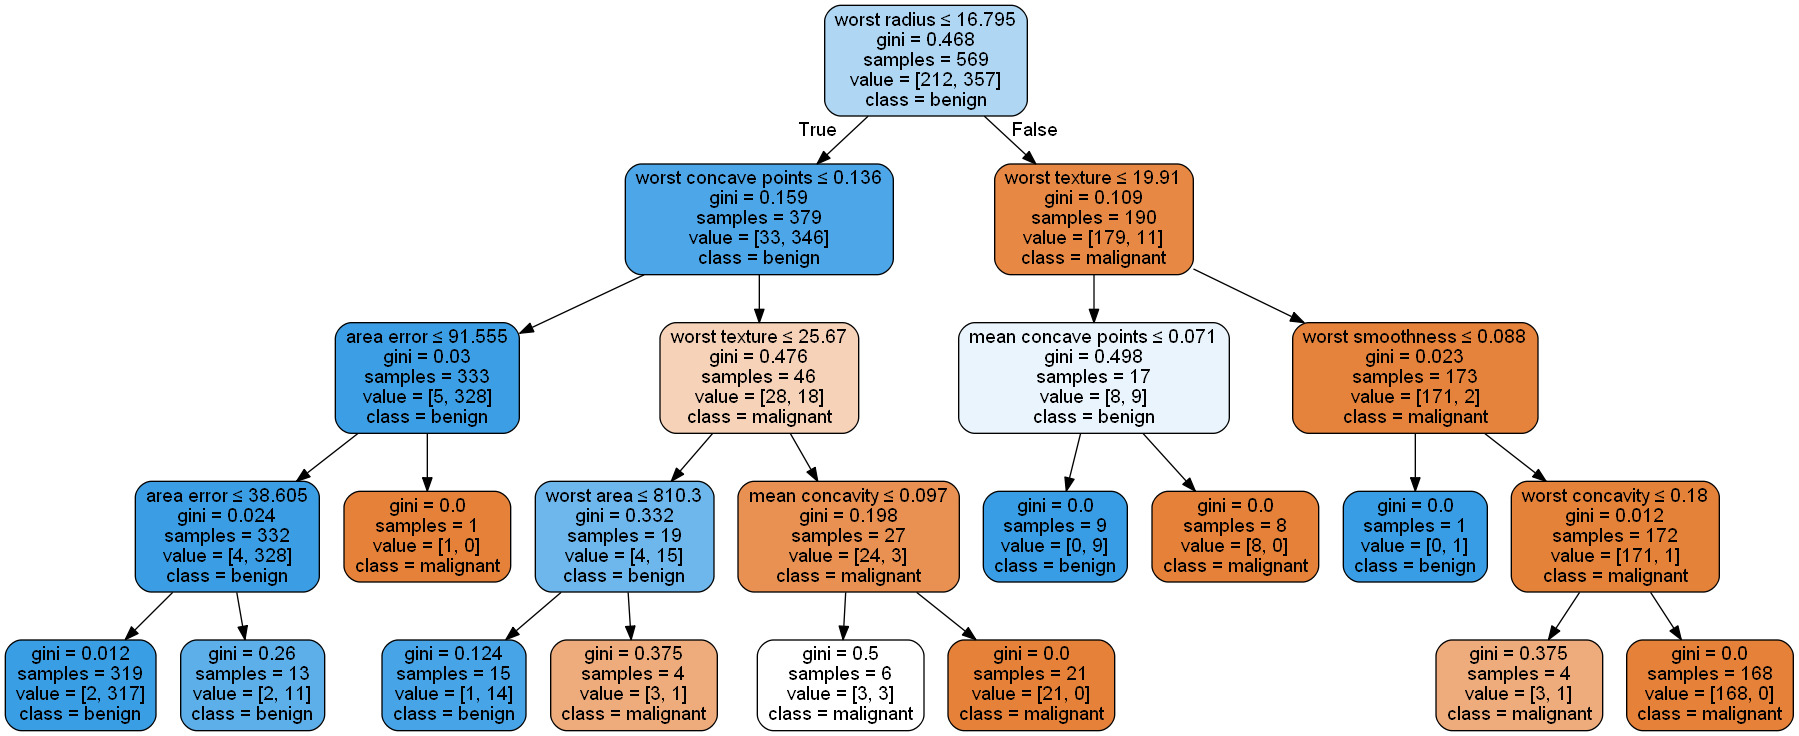

In [15]:
# Visualisiere CLF
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=breast_cancer.target_names, # the target names.
 feature_names=breast_cancer.feature_names, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())